In [5]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [6]:
import zipfile
import os

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
os.listdir()

['.config',
 'archive.zip',
 'netflix_titles.csv',
 'archive (1).zip',
 'sample_data']

In [8]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df = df.dropna(subset=['title', 'country', 'rating', 'type'])


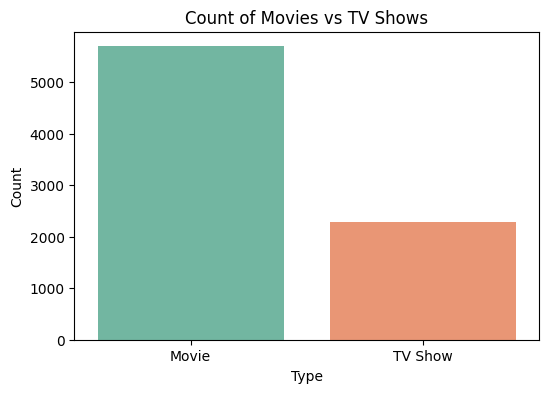

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


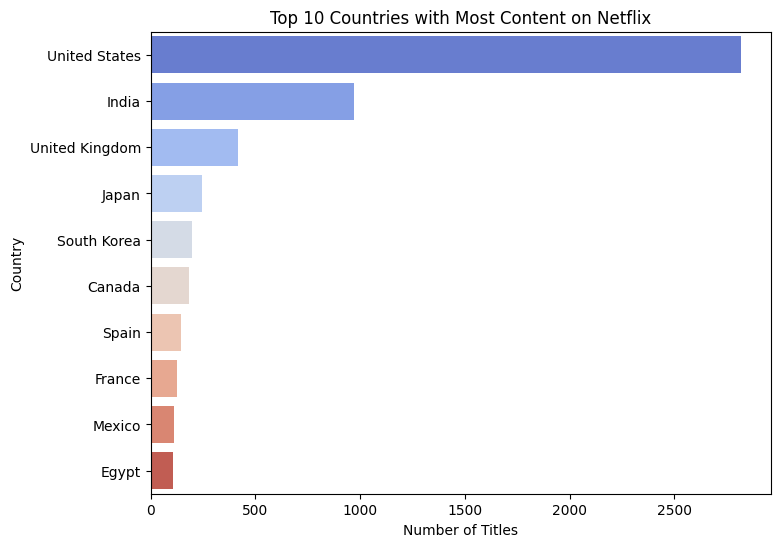

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10)

country_df = top_countries.reset_index()
country_df.columns = ['country', 'count']

plt.figure(figsize=(8,6))
sns.barplot(data=country_df, x='count', y='country', hue='country', palette='coolwarm', dodge=False, legend=False)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


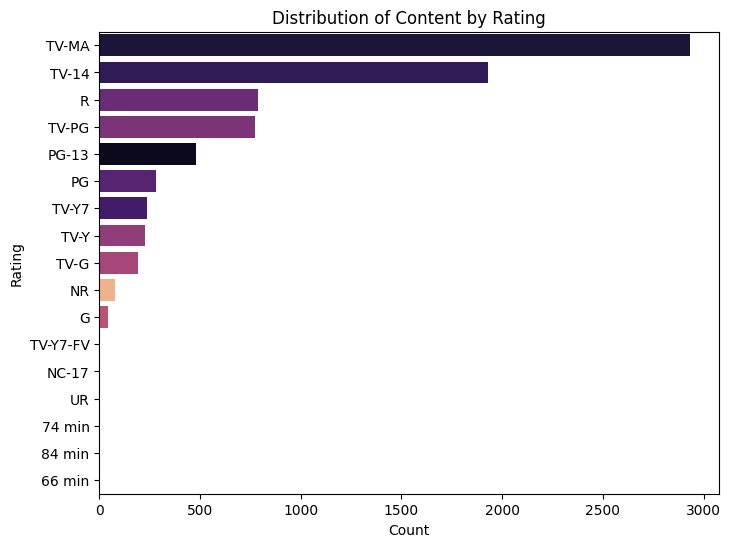

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    y='rating',
    order=df['rating'].value_counts().index,
    hue='rating',
    palette='magma',
    legend=False
)
plt.title('Distribution of Content by Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


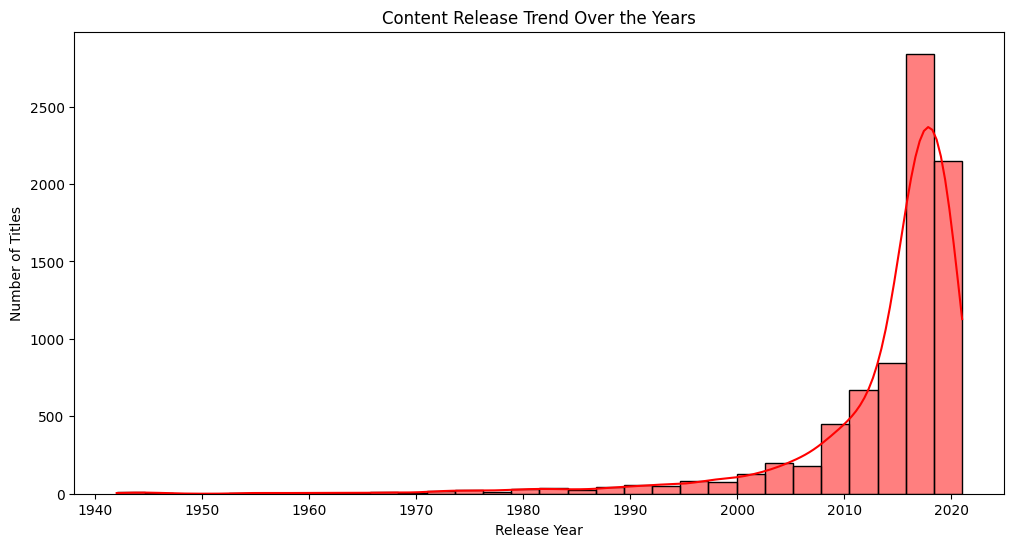

In [22]:
df['release_year'] = df['release_year'].astype(int)
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='red')
plt.title('Content Release Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


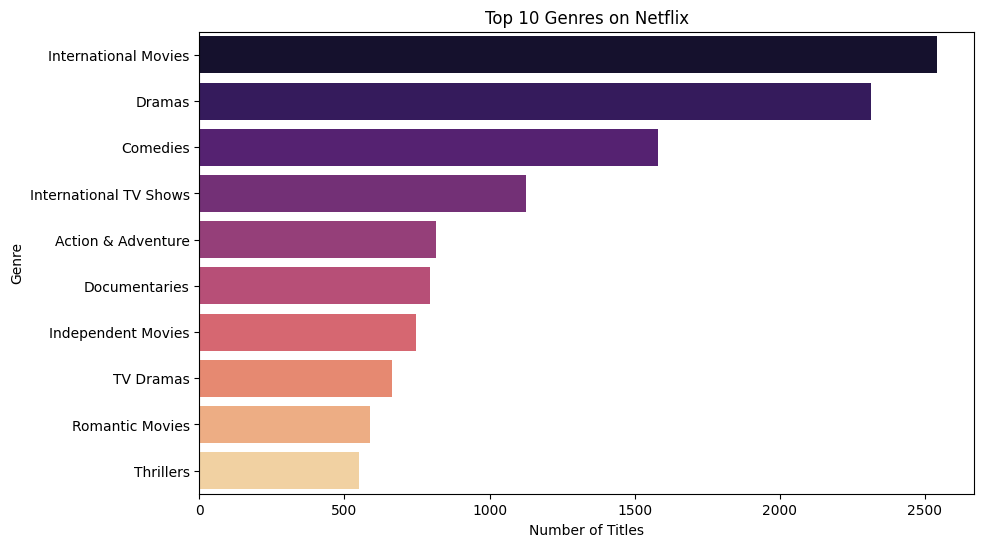

In [20]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])
genre_df = pd.DataFrame(top_genres.items(), columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', hue='Genre', palette='magma', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
